In [1]:
#importing necessary libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE

#Note:The target variable of given dataset is Attrition...
#Reading the values..
attrition = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
attrition.head()




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [0]:
attrition.shape #to know no of rows and columns..

(1470, 35)

In [0]:
# Looking for NULL values..
display(attrition.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

Text(0.5, 1.0, 'Attrition Breakdown')

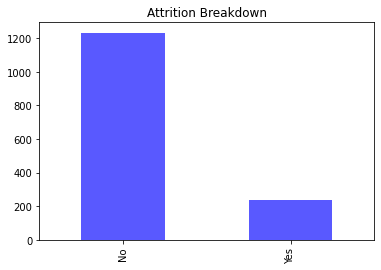

In [3]:
attrition.Attrition.value_counts().plot(kind='bar', color="BLUE", alpha=.65)
plt.title("Attrition Breakdown")

The dataset is imbalanced one so we have to apply oversampling technique smote on latter stages.

Text(0, 0.5, 'Frequency')

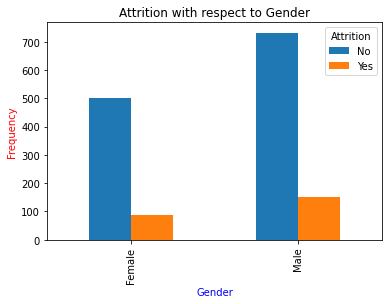

In [11]:
#Breakdown of attricutes with respect to gender...
pd.crosstab(attrition.Gender,attrition.Attrition).plot(kind='bar')
plt.title('Attrition with respect to Gender')
plt.xlabel('Gender', color="BLUE")
plt.ylabel('Frequency', color="RED")

It seems to be more of male employees have been attritioned than female employees.so gender may have some effect on attrition.

Text(0, 0.5, 'Frequency of Attrition')

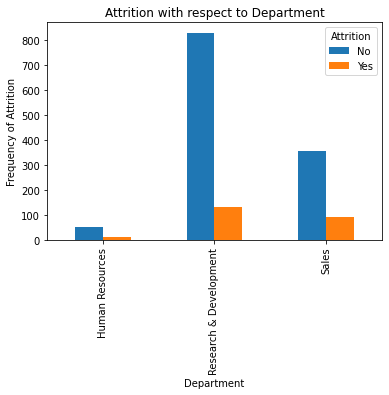

In [0]:
#Breakdown with respect to Department..
pd.crosstab(attrition.Department,attrition.Attrition).plot(kind='bar', stacked=False)
plt.title('Attrition with respect to Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Attrition')

Department variable has a huge effect on attrition varible and this will be useful for modelling and prediction.
When compared to R&D the employees of HR and Sales are comperatively low.

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

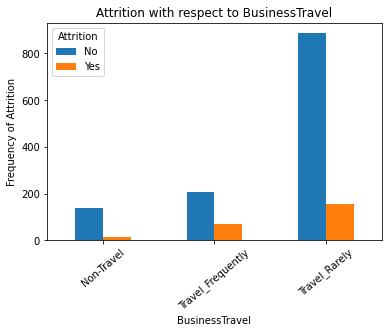

In [0]:
#Breakdown with respect to Business Travel
pd.crosstab(attrition.BusinessTravel,attrition.Attrition).plot(kind='bar')
plt.title('Attrition with respect to BusinessTravel')
plt.xlabel('BusinessTravel')
plt.ylabel('Frequency of Attrition')
plt.xticks(rotation=40)

Irrespective of the business travel the attrition is less.

Text(0, 0.5, 'Frequency of Attrition')

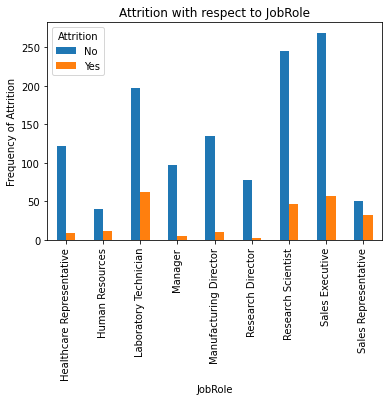

In [0]:
pd.crosstab(attrition['JobRole'],attrition['Attrition']).plot(kind='bar', stacked=False)
plt.title('Attrition with respect to JobRole')
plt.xlabel('JobRole')
plt.ylabel('Frequency of Attrition')


Job role seems to have an impact on the attrition rate of employees based on the above plot and we see less attrition in the case of Research Director

Text(0, 0.5, 'Frequency of Attrition')

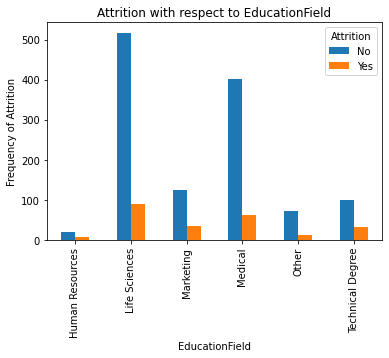

In [0]:
#Breakdown with respect to Education field...
pd.crosstab(attrition.EducationField,attrition.Attrition).plot(kind='bar',stacked=False)
plt.title('Attrition with respect to EducationField')
plt.xlabel('EducationField')
plt.ylabel('Frequency of Attrition')

LifeSciences and Medical has the large number of employees and attrition rate also.The % of employees who have been attritioned and who have been retained are also same in all education fields.

Text(0, 0.5, 'Frequency of Attrition')

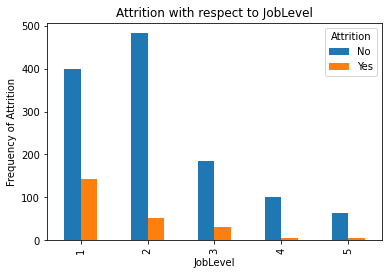

In [0]:
#Breakdown with respect to JobLevel...
pd.crosstab(attrition.JobLevel,attrition.Attrition).plot(kind='bar',stacked=False)
plt.title('Attrition with respect to JobLevel')
plt.xlabel('JobLevel')
plt.ylabel('Frequency of Attrition')

People in Joblevel 4 have a very high percent for a 'No' and a low percent for a 'Yes'. Similar inferences can be made for other job levels.

Text(0, 0.5, 'Frequency of Attrition')

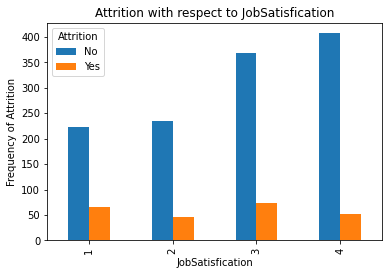

In [0]:
#Breakdown with respect to JobSatisfication...
pd.crosstab(attrition.JobSatisfaction,attrition.Attrition).plot(kind='bar',stacked=False)
plt.title('Attrition with respect to JobSatisfication')
plt.xlabel('JobSatisfication')
plt.ylabel('Frequency of Attrition')

for higher values of job satisfaction(i.e. more a person is satisfied with his job) lesser percent of them say a 'Yes' which is quite obvious as highly contented workers will obvioulsy not like to leave the organisation.

Text(0, 0.5, 'Frequency of Attrition')

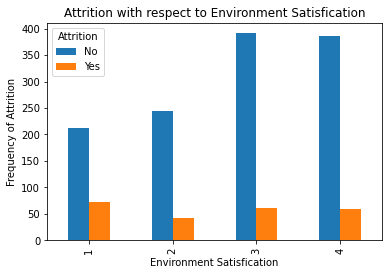

In [0]:
#Breakdown with respect to Environment Satisfication...
pd.crosstab(attrition.EnvironmentSatisfaction,attrition.Attrition).plot(kind='bar',stacked=False)
plt.title('Attrition with respect to Environment Satisfication')
plt.xlabel('Environment Satisfication')
plt.ylabel('Frequency of Attrition')

we can notice that the relative percent of 'No' in people with higher grade of environment satisfacftion.
This can be done for all the features further but i feel this are some of the important features,which can be used aganist our target class

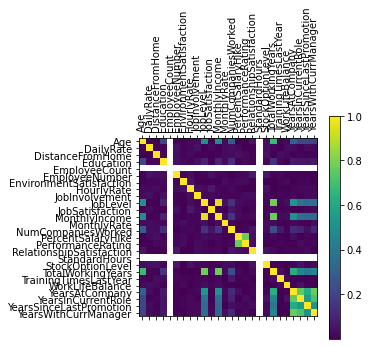

In [0]:
wcorr = attrition.corr()
plt.matshow(wcorr.abs())
plt.colorbar()
plt.xticks(range(len(wcorr.columns)), wcorr.columns, rotation='vertical');
plt.yticks(range(len(wcorr.columns)), wcorr.columns);

 .corr() method on a pandas data frame returns a corelation data frame containing the corelation values b/w the various attributes.we can drop some highly corelated features as they add redundancy to the model but since the corelation is very less in genral let us keep all the features for now. In case of highly corelated features we can use something like Principal Component Analysis(PCA) to reduce our feature space.

In [0]:
# Import the train_test_split method
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
#from sklearn.cross_validation import StratifiedShuffleSplit

# Split data into train and test sets as well as for validation and testing
x_train, x_test, y_train, y_test = train_test_split(attrition_tar,y,train_size= 0.80,random_state=0);
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1176, 34)
(1176,)
(294, 34)
(294,)


Feature Encoding and Categorical Encoding..

In [0]:
def encoding(data):
    # Empty list to store columns with categorical data
    categorical = []
    for col, value in data.iteritems():
        if value.dtype == 'object':
            categorical.append(col)

    # Store the numerical columns in a list numerical
    numerical = data.columns.difference(categorical)
    attrition_cat = data[categorical]
    attrition_cat = pd.get_dummies(attrition_cat)
    # Store the numerical features to a dataframe attrition_num
    attrition_num = data[numerical]
    # Concat the two dataframes together columnwise
    attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)
    print(attrition_final.columns)
    return attrition_final

In [0]:
x_train_encode=encoding(x_train)
x_train_encode.shape

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobR

(1176, 55)

In [0]:
x_test_encode=encoding(x_test)
x_test_encode.shape

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobR

(294, 55)

Here we divided our dataset into numerical and categorical,and we store it in a list.and for every categorical value we have created a dummy values for example,Business travel(Non-travel,Travel-frequently,travelRarely)....

In [0]:
def target_encode(data):
    # Define a dictionary for the target mapping
    target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
    target = data.apply(lambda x: target_map[x])
    return target

In [0]:
y_train_encode=target_encode(y_train)
y_test_encode=target_encode(y_test)

Now we encoded the target class Attrition with values of 1 and 0 by replacing the yes/no.

In [0]:
#Since we have noticed severe imbalance at the beginning we now use SMOTE method to reduce the imbalances.
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(x_train_encode,y_train_encode)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


**Random Forest Method**

In [0]:
seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

rf = RandomForestClassifier(**rf_params)
rf.fit(smote_train, smote_target)
print("Fitting of Random Forest finished")

Fitting of Random Forest finished


In [0]:
rf_predictions = rf.predict(x_test_encode)
print("Predictions finished")

Predictions finished


In [0]:
print("Accuracy score: {}".format(accuracy_score(y_test_encode, rf_predictions)))
print("="*80)
print(classification_report(y_test_encode, rf_predictions))

Accuracy score: 0.8537414965986394
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       245
           1       0.57      0.49      0.53        49

    accuracy                           0.85       294
   macro avg       0.74      0.71      0.72       294
weighted avg       0.85      0.85      0.85       294



The Random Forest classifier in Sklearn contains a very convenient attribute featureimportances which tells us which features within our dataset has been given most importance through the Random Forest algorithm. And the Accuracy of Random Forest Model is **85.3%**.

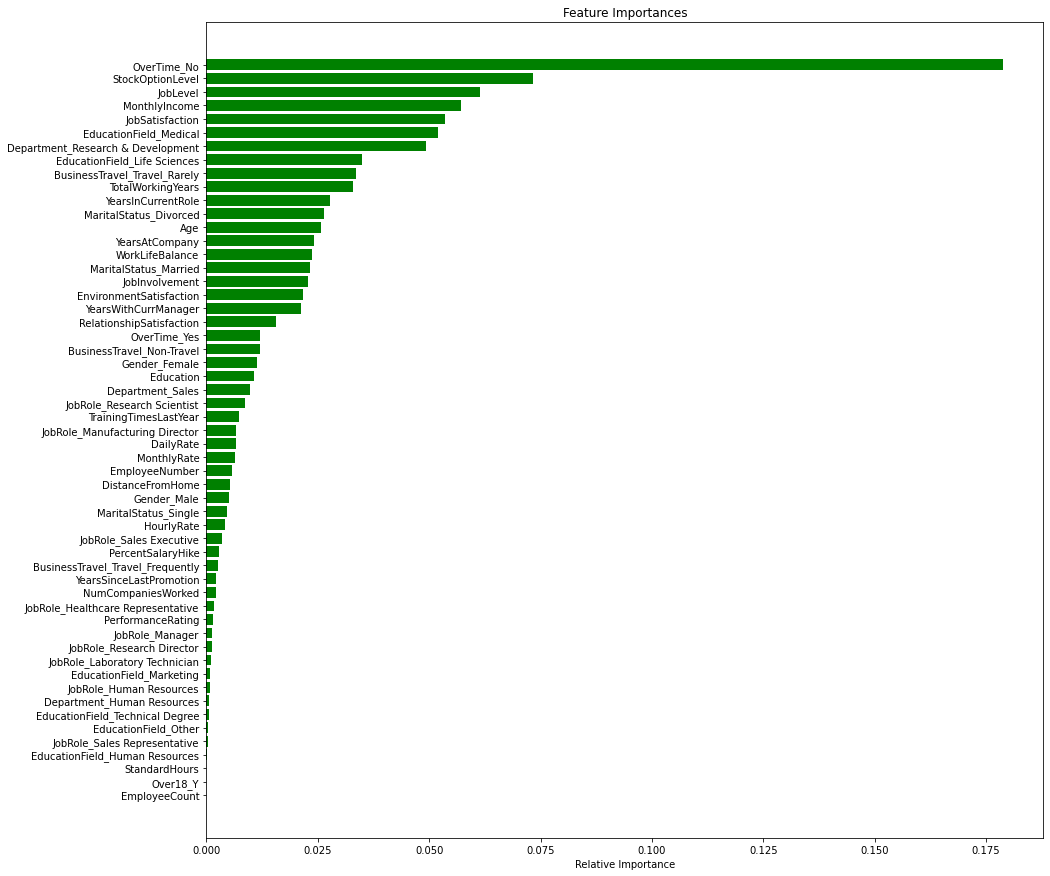

In [0]:
#Shown below is an Interactive Plotly diagram of the various feature importances.

features = x_train_encode.columns.values
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Decision Tree**

In [0]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(smote_train, smote_target)
print("Fitting of Random Forest finished")

Fitting of Random Forest finished


In [0]:
dt_predictions = dt.predict(x_test_encode)
print("Predictions finished")

Predictions finished


In [0]:
print("Accuracy score: {}".format(accuracy_score(y_test_encode, dt_predictions)))
print("="*80)
print(classification_report(y_test_encode, dt_predictions))

Accuracy score: 0.7448979591836735
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       245
           1       0.28      0.35      0.31        49

    accuracy                           0.74       294
   macro avg       0.57      0.59      0.58       294
weighted avg       0.77      0.74      0.75       294



The Accuracy of Decision Tree is around **74.5%**